In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

#  Building our Model To train the data

In [ ]:
# Working with pre trained model

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)
# creating our model.
model = Model(base_model.input, x)

In [ ]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

# Preparing our data using data generator

In [ ]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2,
     shear_range = 0.2,
     horizontal_flip=True,
     rescale = 1./255
)

dataset_dir = "/content/dataset"
ipynb_checkpoints_path = os.path.join(dataset_dir, ".ipynb_checkpoints")
if os.path.exists(ipynb_checkpoints_path):
    os.rmdir(ipynb_checkpoints_path)

train_data = train_datagen.flow_from_directory(directory= "/content/dataset",
                                               target_size=(224,224),
                                               batch_size=32,
                                  )


train_data.class_indices

Found 872 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [ ]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/dataset",
                                           target_size=(224,224),
                                           batch_size=32,
                                  )

Found 872 images belonging to 7 classes.


# visualizaing the data that is fed to train data gen

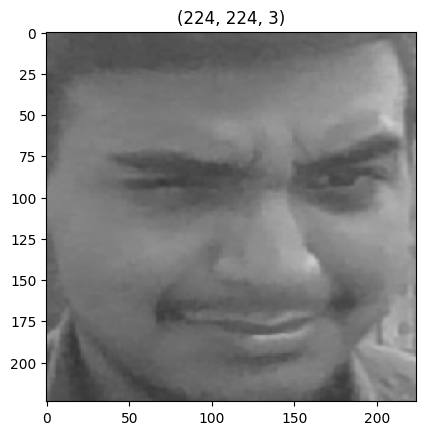

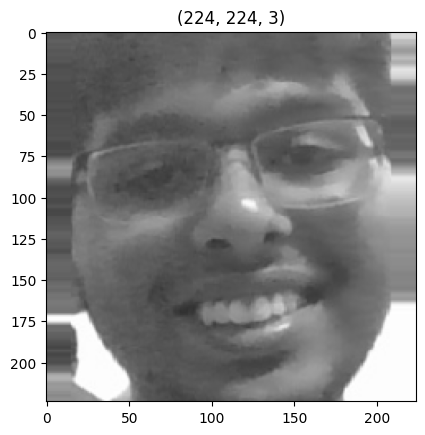

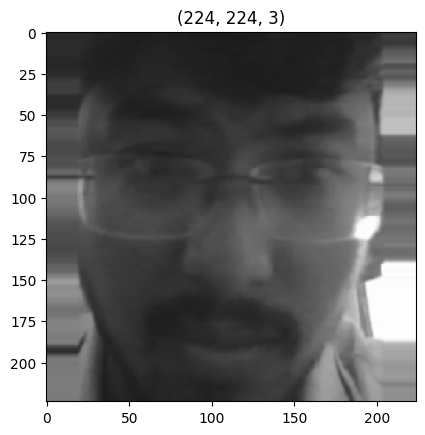

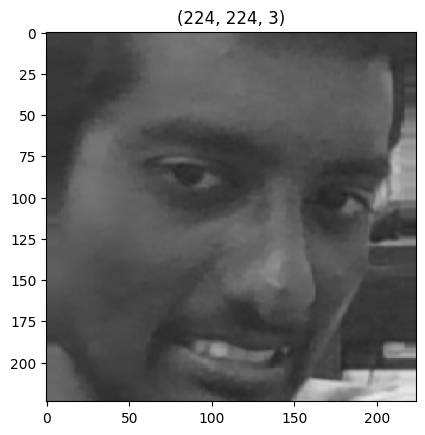

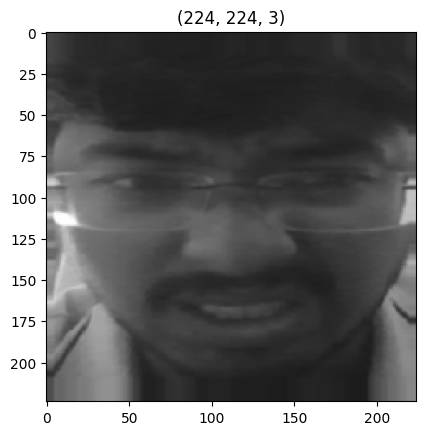

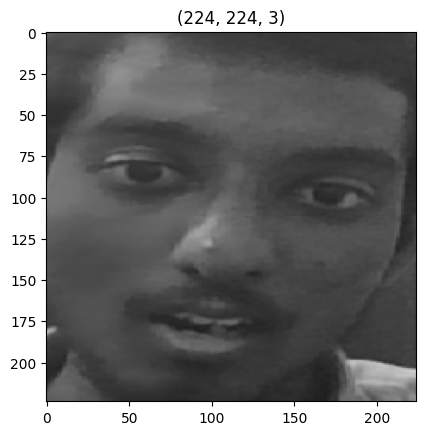

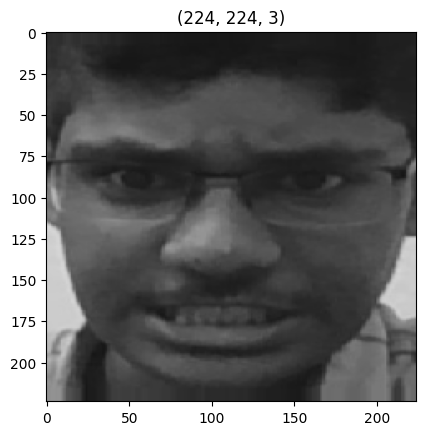

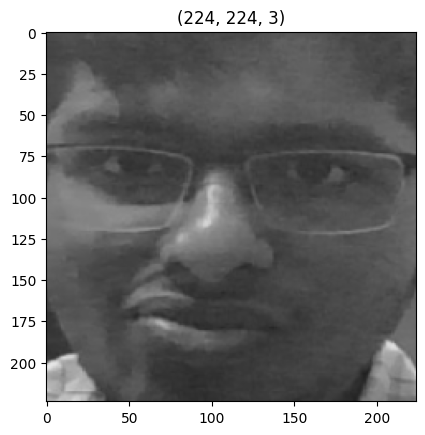

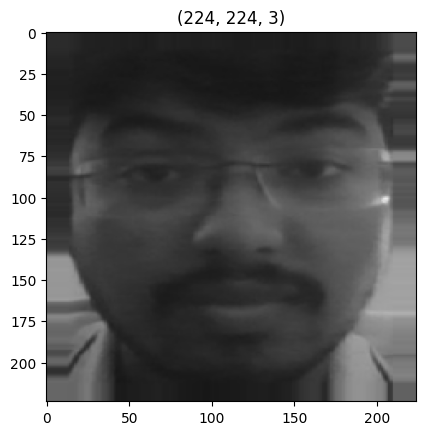

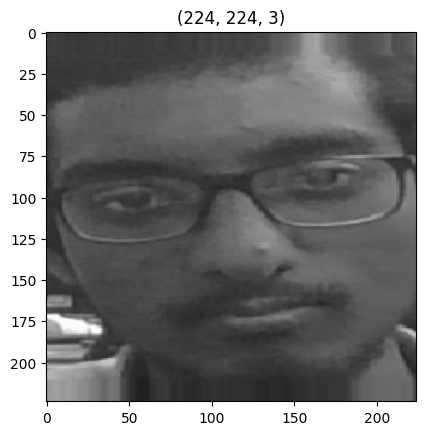

In [ ]:

t_img , label = train_data.next()

def plotImages(img_arr, label):
  """
  input  :- images array
  output :- plots the images
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()

    count += 1
    if count == 10:
      break

plotImages(t_img, label)

# having early stopping and model check point

In [ ]:
## having early stopping and model check point

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# Train the model using fit_generator
hist = model.fit_generator(train_data,
                           steps_per_epoch=10,
                           epochs=30,
                           validation_data=val_data,
                           validation_steps=8,
                           callbacks=[es, mc])


<ipython-input-48-a963d2e34040>:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 10.1813 - accuracy: 0.3031
Epoch 1: val_accuracy improved from -inf to 0.51953, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 8s 540ms/step - loss: 10.1813 - accuracy: 0.3031 - val_loss: 6.0896 - val_accuracy: 0.5195
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 3.3635 - accuracy: 0.6486
Epoch 2: val_accuracy improved from 0.51953 to 0.86328, saving model to best_model.h5
10/10 [==============================] - 4s 422ms/step - loss: 3.3635 - accuracy: 0.6486 - val_loss: 0.9257 - val_accuracy: 0.8633
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 2.1521 - accuracy: 0.7601
Epoch 3: val_accuracy improved from 0.86328 to 0.89453, saving model to best_model.h5
10/10 [==============================] - 5s 503ms/step - loss: 2.1521 - accuracy: 0.7601 - val_loss: 0.6305 - val_accuracy: 0.8945
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.9363 - accuracy: 0.8375
Epoch 4: val_accuracy did not improve from 0.89453
10/10 [==============================] - 4s 399ms/step - loss: 0.9363 - accuracy: 0.8375 - val_loss: 

In [ ]:

# Loading the best fit model
from keras.models import load_model
model = load_model("/content/best_model.h5")

In [ ]:
# just to map o/p values
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 [==============================] - 0s 21ms/step
 the image is of happy


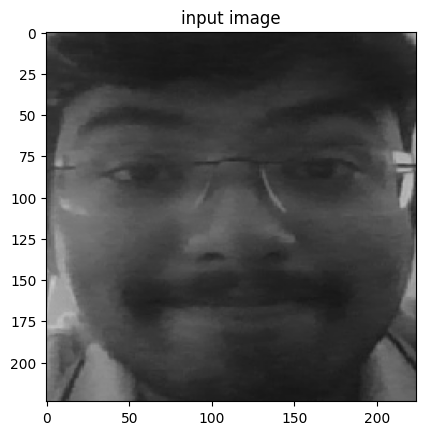

In [ ]:
# path for the image to see if it predics correct class

path = "/content/dataset//happy/happy_0.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()